# Intro to Numerical Methods:
### Finite Differencing and Understanding Velocities and Accelerations

Suppose we have $n$ position measurements, for anything:

$$[x_0,x_1,x_2,...,x_{n-1}]$$

and for these positions, there are $n$ associated times:

$$[t_0,t_1,t_2,...,t_{n-1}]$$

In a sence, we have a function that gives position outputs from time inputs:

$$x(t)  = x_i \text{, when } t = t_i$$

$$x: [t_0,t_1,t_2,...,t_{n-1}] \longrightarrow [x_0,x_1,x_2,...,x_{n-1}]$$

#### How do we determine the velocity?
When a function specifies the path of an object in time, the usual calculus way of determining the velocity is to take the first derivatve:
$$v(t) = \frac{dx}{dt}(t)$$
But you can only take derivatives when functions are "smooth" enough, and our function for positions is not smooth, nor continous; it's discrete.

So, we have to take finite differences:

$$
\begin{align}
\begin{cases}
[x_0,x_1,...,x_{n-1}] \\
[t_0,t_1,...,t_{n-1}]
\end{cases} & \longrightarrow & \left[\frac{x_1-x_0}{t_1-t_0},\frac{x_2-x_1}{t_2-t_1},...,\frac{x_{n-1}-x_{n-2}}{t_{n-1}-t_{n-2}}\right] = [v_0,v_1,...,v_{n-2}]
\end{align}
$$

We are missing the $n^\text{th}$ entry for velocity, but we actually can't retrieve it, as we would require the $(n+1)^\text{th}$ entries in $x$ and $t$.

# Exercise: Use these principles

Determine the velocity at each point in time of the data provided in the folder "4.18mm". Here's how to import the data and how it looks:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

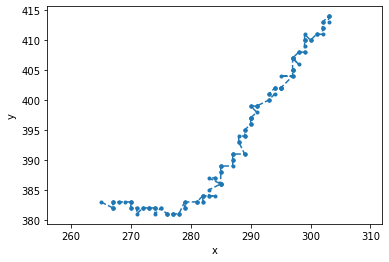

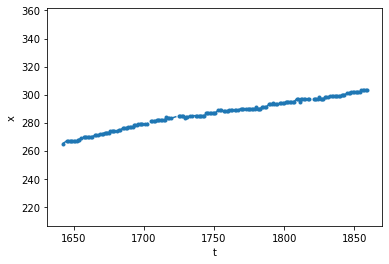

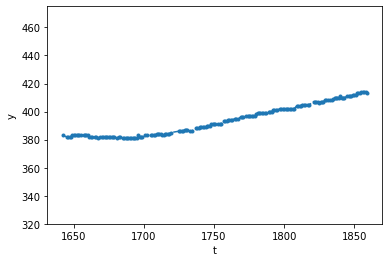

In [2]:

#Import the data:
path = "4.18mm\\Day6_4_18mm_Droplet (1).csv" #specify the path
data = np.loadtxt(path, dtype = float, delimiter = ",") #load the data into an nd-array

#extract the columns of the data:
frame = data[:,0] #the frame number, from the camera
x = data[:,1] #
y = data[:,2]

##################
#Visualize the Data

#Plot in position space:
plt.plot(x,y,".--")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

#Plot x vs t
plt.plot(frame,x,".--")
plt.ylabel("x")
plt.xlabel("t")
plt.axis('equal')
plt.show()

#Plot y vs t
plt.plot(frame,y,".--")
plt.ylabel("y")
plt.xlabel("t")
plt.axis('equal')
plt.show()


# To get the velocity:

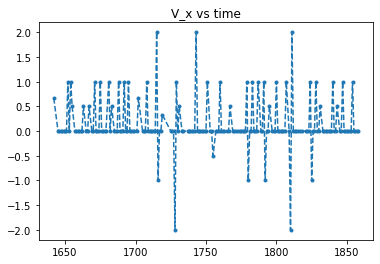

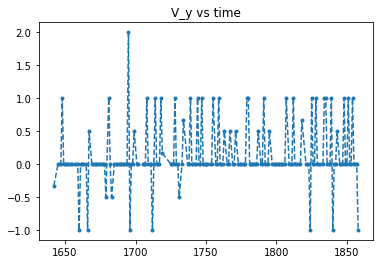

Text(0.5, 1.0, 'Speed vs time')

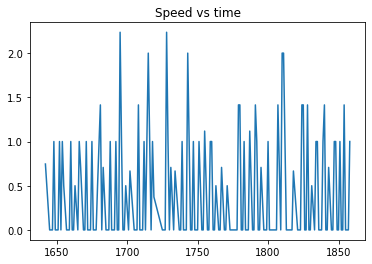

In [3]:
#Create the "small changes"
Delta_x = [x[i+1]-x[i] for i in range(len(x)-1)]
Delta_y = [y[i+1]-y[i] for i in range(len(y)-1)]
Delta_t = [frame[i+1]-frame[i] for i in range(len(frame)-1)]

#Cast them as numpy arrays
Delta_x = np.array(Delta_x)
Delta_y = np.array(Delta_y)
Delta_t = np.array(Delta_t)

#Compute velocity / rate of change of position w.r.t time
v_x = Delta_x/Delta_t
v_y = Delta_y/Delta_t

#Also calculate the speed in 2 dimensions
speed = np.sqrt(v_x**2 + v_y**2)

#Plot it all
plt.plot(frame[0:len(frame)-1],v_x, '.--')
plt.title("V_x vs time")
plt.show()

plt.plot(frame[0:len(frame)-1],v_y, '.--')
plt.title("V_y vs time")
plt.show()

plt.plot(frame[0:len(frame)-1],speed)
plt.title("Speed vs time")

# You can also draw the velocity field as vectors

The actual velocity in 2d is given by:

$$\vec{v} = \left[\begin{matrix}v_x \\ v_y\end{matrix}\right] = \left[\begin{matrix}v_x & v_y\end{matrix}\right]$$

We can just draw this using matplotlib. It might give a better idea of how the thing is moving.

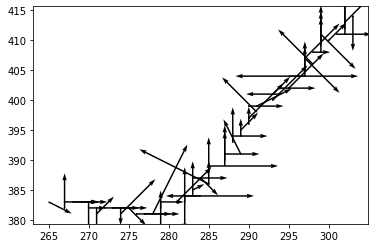

In [4]:
#Create an array that holds this vector for velocity at each time:
v = [np.array([v_x[i],v_y[i]]) for i in range(len(v_x))]
v = np.array(v)
#print(v)

#set up up the origins of each vector:
x_new = x[0:len(x)-1]
y_new = y[0:len(y)-1]
origins = [x_new,y_new]

#plot them:
plt.quiver(*origins,v_x,v_y)
plt.show()


## Can Also Get Acceleration

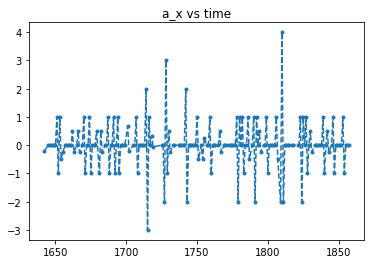

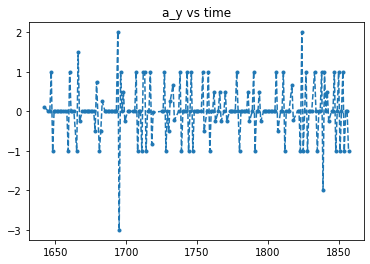

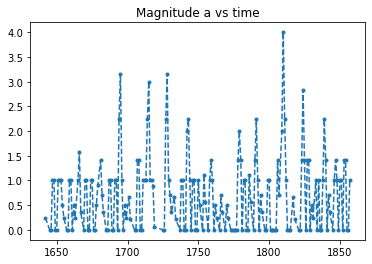

In [5]:
Delta_v_x = [v_x[i+1]-v_x[i] for i in range(len(v_x)-1)]
Delta_v_y = [v_y[i+1]-v_y[i] for i in range(len(v_y)-1)]
Delta_t = Delta_t[0:len(Delta_t)-1]

Delta_v_x = np.array(Delta_v_x)
Delta_v_y = np.array(Delta_v_y)

a_x = Delta_v_x/Delta_t
a_y = Delta_v_y/Delta_t

a = np.sqrt(a_x**2+a_y**2)

plt.plot(frame[0:len(frame)-2],a_x, ".--")
plt.title("a_x vs time")
plt.show()

plt.plot(frame[0:len(frame)-2],a_y, ".--")
plt.title("a_y vs time")
plt.show()


plt.plot(frame[0:len(frame)-2],a, ".--")
plt.title("Magnitude a vs time")
plt.show()

# Generating Data from an Equation

You've seen how we can determine velocities and accelerations from positional data/observations, but in simulation, you are usually doing the opposite.

You start with an equation, say Newton's 2nd Law:

$$\vec{F} = m\vec{a} = m\frac{\Delta \vec{v}}{\Delta t} = m \frac{\Delta}{\Delta t}\left(\frac{\Delta \vec{x}}{\Delta t}\right)$$

and you probably know something about the force $\vec{F}$. This is in general the problem in physics; what do the dynamics say about the kinematics? What motion will this force cause?

### Euler Method
One of the simplest cases of using finite differencing to find numerical solutions is Euler's method; it basically just involves adding small $\Delta$ 's to other small $\Delta$ 's to get the final product. In the context of Newton's 2nd Law (and sticking to 1D), if you have an initial condition on velocity, and you know the force as a function of time:
$$\begin{cases}v(t=0) = v_0 \\ F = F(t) \end{cases}$$
then you can evolve the velocity v in this way, by using Newton's 2nd law above:
$$\frac{\Delta v}{\Delta t}(t = 0) = \frac{F(t=0)}{m}$$
$$\Rightarrow \Delta v = [v(\Delta t) - v(0)] = \Delta t \cdot \frac{F(0)}{m} $$
$$\Rightarrow v(\Delta t) = v (0) + \Delta t \cdot \frac{F(0)}{m} $$

you can also just continue doing this, since you obtain at each step the new velocity:
$$\Delta v = [v(t+\Delta t) - v(t)] = \Delta t \cdot \frac{F(t)}{m} $$
$$\Rightarrow \boxed{ v(t+\Delta t) = v (t) + \Delta t \cdot \frac{F(t)}{m} }$$

You can do the same sort of thing to also determine the position $x$, provided an initial $x(t=0)=x_0$, since you know $v = \frac{\Delta x}{\Delta t}$: 

$$\Rightarrow \boxed{ x(t+\Delta t) = x (t) + \Delta t \cdot v(t) }$$



![Euler_method.png](attachment:"Euler_method.png")

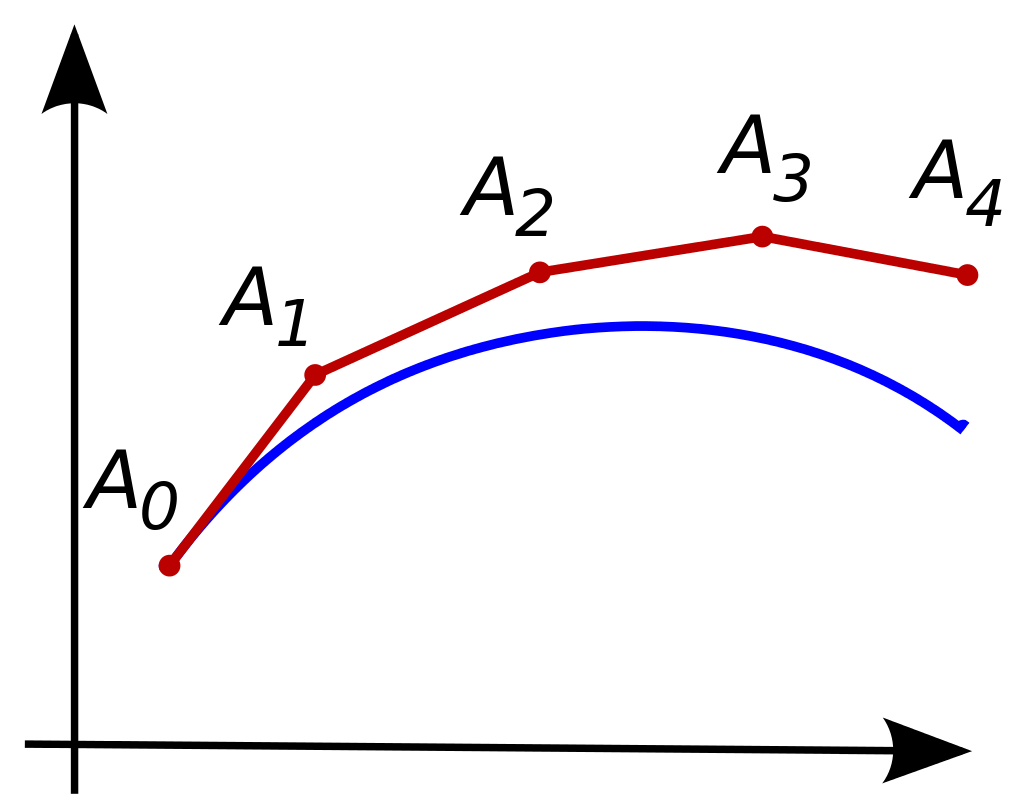

In [15]:
from IPython.display import Image
Image(filename='Euler_method.png', width=300,height=250) 

We can try using this approach do termine the velocity of an object, say, in the gravitational field of the Earth ($g = 9.81 m/s^2$):
$$F = -mg = ma =m\frac{\Delta v_\text{up}}{\Delta t}$$

where we our 1D coordinate as just pointing up, and take that direction as positive. Our equations of motion for velocity and for position look like:
$$\Delta v_\text{up} = \Delta t \cdot \left(-g\right)$$

$$\Delta z = \Delta t \cdot v$$

We can use this to evolve a system from some initial velocity and position, treating the paths of the system in $z$ and in $v$ as sequences (or otherwise NumPy arrays):

We can also check how well this matches up with our analytic formula, from kinematics:
$$x(t) = x_0 +tv_0-\frac{1}{2}gt^2$$

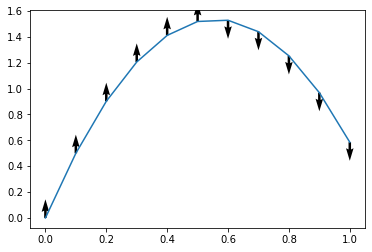

In [52]:
#Define our constant g:
g = 9.81

#Initial conditions:
z = 0
v = 5 #up at speed 5

#create our lists to hold the data:
# and initialize with our values above
z_array = [z]
v_array = [v]

#Define our time step:
Delta_t = 0.1 #make it kind of small

#Choose number of steps to take:
N = 10
#run a for loop that iterates some number of times
for i in range(N):

    #evolve x:
    z += Delta_t * v

    #evolve v:
    v += Delta_t * (-g)

    #append these values to our arrays:
    v_array.append(v)
    z_array.append(z)

t = np.arange(0,Delta_t*(N+1),Delta_t)

plt.plot(t,z_array)
#plt.show()

#Try drawing it with vectors:
for i in range(len(t)):
    t_ = t[i]
    z_ = z_array[i]
    v_ = v_array[i]
    plt.quiver(t_,z_,0,v_)

# #Now compare to analytic answer:
# def x(t,x_0,v_0,a):
#     x_s = []
#     for tt in t:
#         tt
#         x = x_0 + tt*v_0 + 0.5*a*tt**2
#         x_s.append(x)
#     return x_s

# x_0 = 0
# v_0 = 5
# print(len(x(t,x_0,v_0,-g)))
# print(len(t))
# plt.plot(t,x(t,x_0,v_0,-g))
# plt.show()



# Other Finite Differencing Methods:

1. #### Leap Frog / "Kick-Drift-Kick"
2. #### Runge Kutta method(s)
3. #### More on ODEs https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations 
4. #### Even More on PDEs https://en.wikipedia.org/wiki/Numerical_methods_for_partial_differential_equations#:~:text=Numerical%20methods%20for%20partial%20differential%20equations%20is%20the%20branch%20of,Elliptic%20partial%20differential%20equations%20exist. 

The leap-frog has a particular form called "kick-drift-kick" (KDK):

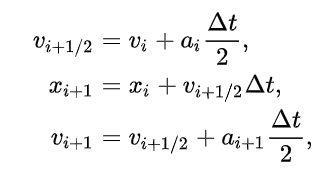

In [54]:
from IPython.display import Image
Image(filename='LeapFrog.png', width=400,height=250) 

Notice how this one returns the kinematics equations when you plug the first line into the second and third:

$$\begin{cases} x_{i+1} = x_i + v_{i+1/2}\Delta t = x_i +\left(v_i +a_i\frac{\Delta t }{2}\right)\Delta t \\
v_{i+1} = v_{i+1/2}+a_{i+1}\frac{\Delta t}{2} = v_i+(a_{i+1}+a_i)\frac{\Delta t}{2}
\end{cases}$$

$$\Rightarrow \begin{cases}
x_{i+1} = x_i + v_i \Delta t +a_i\frac{\Delta t^2 }{2} \\
v_{i+1} = v_i + a_\text{i,avg} \Delta t
\end{cases}$$

If the acceleration $a$ is a constant, you get exactly the kinematics equations, since $a_i = a_{i+1}$.

This numerical scheme is actually one I use in my simulations.